In [1]:
from qiskit import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from qiskit import *
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

C:\Users\Annanay\Anaconda3\envs\project\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [15]:
circ = QuantumCircuit(1,1)
circ.u3(6.283185307179585,-np.pi/2,np.pi/2,0)
circ.measure(0,0)

In [16]:
qiskit.execute(circ, shots=1, backend=provider.get_backend('ibmq_ourense'))

In [12]:
backend_name = 'ibmq_ourense'
backend = provider.get_backend(backend_name)
results1 = backend.jobs(job_name='sigma_x_1')[0].result().get_counts() + backend.jobs(job_name='sigma_x_2')[0].result().get_counts()
results1 = list(map(lambda x: x['0'], results1))
results2 = backend.jobs(job_name='x_2pi_1')[0].result().get_counts() + backend.jobs(job_name='x_2pi_2')[0].result().get_counts()
results2 = list(map(lambda x: x['0'], results2))
#results3 = backend.jobs(job_name='ampcal_1')[0].result().get_counts() + backend.jobs(job_name='ampcal_2')[0].result().get_counts() + backend.jobs(job_name='ampcal_3')[0].result().get_counts() + backend.jobs(job_name='ampcal_4')[0].result().get_counts()
#results3 = list(map(lambda x: x['0'], results3))

columns = ['xgate u3(pi,0,pi)', 'rx(2pi) u3(2pi,-pi/2,pi/2)']
pd.DataFrame(dict(zip(columns,[results1, results2])), columns=columns).to_csv(backend_name+'.csv')


In [33]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [87]:
result1 = provider.get_backend('ibmq_armonk').jobs(job_name='x_180_1')[0].result().get_counts()
result2 = provider.get_backend('ibmq_armonk').jobs(job_name='x_180_2')[0].result().get_counts()
result = [*result1,*result2][::2]

In [88]:
result = list(map(lambda x: x['0']/8192, result))

In [152]:
poly1[3](x)

0.9842875459860466

In [179]:
def f(dth, domega, dg):
    maxi = 60
    gamma = 0
    alpha = np.array([(np.pi/2 + dth)*np.cos(gamma+dg),(np.pi/2 + dth)*np.sin(gamma+dg),domega])
    maxi = len(result)
    a = 2*np.linalg.norm(alpha)
    x = (np.cos(a/2))**2 - (np.sin(a/2))**2 * (domega**2-(np.pi/2 + dth**2))/(domega**2+(np.pi/2 + dth**2))
    y = [(poly1[n](x))**2 +(domega*np.sin(a)*poly2[n-1](x)/a)**2 for n in range(1,maxi+1)]
    plt.scatter(np.linspace(1,maxi, maxi), y)
interact(f, dth=(0,1,0.01), domega=(0,1,0.01), dg=(0,1,0.01))

interactive(children=(FloatSlider(value=0.0, description='dth', max=1.0, step=0.01), FloatSlider(value=0.0, de…

<function __main__.f(dth, domega, dg)>

In [174]:
from scipy.optimize import curve_fit
fits, _ = curve_fit(f, np.array(range(1,len(result)+1)), np.array(result), p0=np.array([0,0]))
print(fits[0])

0.0


In [5]:
def calc_poly1 (n):
    #Chebyshev Polynomial of the first kind T_n
    cheb = np.polynomial.chebyshev.Chebyshev([0 for i in range(n)]+[1])
    return(np.polynomial.Polynomial(np.polynomial.chebyshev.cheb2poly(cheb.coef)))
def calc_poly2 (n): 
    #Chebyshev Polynomial of the second kind U_n
    if n%2 == 0:
        return(2*sum([ poly1[2*j] for j in range(int(0.5*n+1))])-1)
    else:
        return (2*sum([ poly1[2*j+1] for j in range(int(0.5*n+1))]))

In [178]:
poly1 = [calc_poly1(n) for n in range(201)]
poly2 = [calc_poly2(n) for n in range(201)]

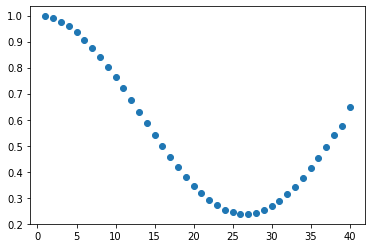

In [30]:
poly1[90]

Polynomial([-1.00000000e+00,  0.00000000e+00,  4.05000000e+03,  0.00000000e+00,
       -2.73240000e+06,  0.00000000e+00,  7.36290720e+08,  0.00000000e+00,
       -1.06025864e+11,  0.00000000e+00,  9.46693156e+12,  0.00000000e+00,
       -5.73753428e+14,  0.00000000e+00,  2.50812213e+16,  0.00000000e+00,
       -8.26008221e+17,  0.00000000e+00,  2.11738839e+19,  0.00000000e+00,
       -4.33284530e+20,  0.00000000e+00,  7.22140884e+21,  0.00000000e+00,
       -9.96345103e+22,  0.00000000e+00,  1.15330778e+24,  0.00000000e+00,
       -1.13256044e+25,  0.00000000e+00,  9.52392206e+25,  0.00000000e+00,
       -6.91252408e+26,  0.00000000e+00,  4.35944923e+27,  0.00000000e+00,
       -2.40254091e+28,  0.00000000e+00,  1.16265209e+29,  0.00000000e+00,
       -4.96064891e+29,  0.00000000e+00,  1.87248652e+30,  0.00000000e+00,
       -6.27065254e+30,  0.00000000e+00,  1.86726098e+31,  0.00000000e+00,
       -4.95287664e+31,  0.00000000e+00,  1.17170910e+32,  0.00000000e+00,
       -2.47419720e+

Text(0, 0.5, 'phi')

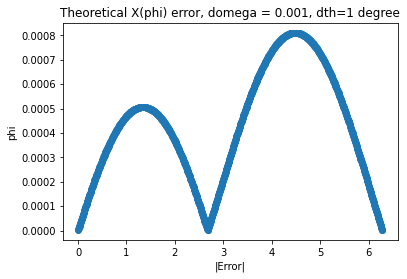

In [28]:
theta = np.pi/2
domega = 0.001
dtheta = np.pi/180
delta = np.sqrt((theta + dtheta)**2 + domega**2)
x = np.linspace(0,2*np.pi, 1000)
k = ((theta + dtheta)*np.sin(delta/2)/delta)**2
y1= (domega*np.sin(delta)/delta - k * np.sin(x) )**2 + (np.cos(delta) + 2*k * np.cos(x/2)**2)**2 -(1+np.cos(x))/2
y2= (domega*np.sin(delta)/delta + k * np.sin(x) )**2 + (np.cos(delta) + 2*k * np.cos(x/2)**2)**2 -(1+np.cos(x))/2
plt.scatter(x,np.abs(y1))
plt.title('Theoretical X(phi) error, domega = 0.001, dth=1 degree')
plt.xlabel('|Error|')
plt.ylabel('phi')

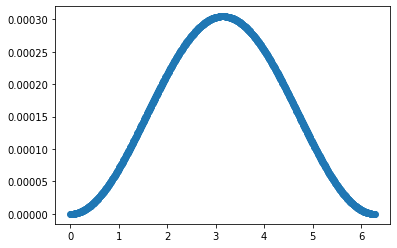

In [23]:
plt.scatter(x,y2)